# import libraries and read datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1S8HLFd-qRBoezHH605OhQf--6dSkE5YOC_2wl66y7-4/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Cleaning datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df_cleaned = df.copy()

df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [ ]:
df_cleaned.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [ ]:
# check duplicate in game name
df_cleaned['Name'].duplicated().sum()

2

In [ ]:
# get the duplicated rows
duplicated_rows = df_cleaned[df_cleaned.duplicated(subset='Name', keep=False)]
print(duplicated_rows)

                                 Name  Sales     Series    Release  \
157  StarCraft II: Heart of the Swarm    1.0  StarCraft 2013-03-01   
158  StarCraft II: Legacy of the Void    1.0  StarCraft 2015-11-01   
175  StarCraft II: Heart of the Swarm    1.0  StarCraft 2013-03-01   
176  StarCraft II: Legacy of the Void    1.0  StarCraft 2015-11-01   

                  Genre               Developer               Publisher  
157  Real-time strategy  Blizzard Entertainment  Blizzard Entertainment  
158  Real-time strategy  Blizzard Entertainment  Blizzard Entertainment  
175  Real-time strategy  Blizzard Entertainment  Blizzard Entertainment  
176  Real-time strategy  Blizzard Entertainment  Blizzard Entertainment  


In [ ]:
# delete the duplicate row (keep the first)

df_dropped = df_cleaned.drop_duplicates(subset='Name', keep='first')

print(df_dropped)

                                     Name  Sales          Series    Release  \
0           PlayerUnknown's Battlegrounds   42.0             NaN 2017-12-01   
1                               Minecraft   33.0       Minecraft 2011-11-01   
2                              Diablo III   20.0          Diablo 2012-05-01   
3                             Garry's Mod   20.0             NaN 2006-11-01   
4                                Terraria   17.2             NaN 2011-05-01   
..                                    ...    ...             ...        ...   
170                              Vietcong    1.0        Vietcong 2003-03-01   
171    Warhammer Online: Age of Reckoning    1.0       Warhammer 2008-09-01   
172        Who Wants to Be a Millionaire?    1.0             NaN 1999-11-01   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander 1994-12-01   
174                            Zoo Tycoon    1.0      Zoo Tycoon 2001-10-01   

                       Genre               Develope

In [ ]:
publisher_mapping = {
    'EA Games': 'Electronic Arts',
    'Sierra On-Line': 'Sierra',
    'Sierra Online': 'Sierra',
    'Sierra Entertainment': 'Sierra',
    'Sierra Studios': 'Sierra',
    'Namco Bandai Games': 'Bandai Namco Entertainment',
    'Bandai Namco Games': 'Bandai Namco Entertainment',
    'GT Interactive Software': 'GT Interactive',
    'Microsoft Game Studios': 'Microsoft',
    'Softstar': 'Softstar Entertainment',
}

df_dropped['Publisher'] = df_dropped['Publisher'].replace(publisher_mapping)
df_dropped['Publisher'].value_counts()

<ipython-input-9-53a7bace7ec0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Publisher'] = df_dropped['Publisher'].replace(publisher_mapping)


Electronic Arts           20
Blizzard Entertainment     8
Paradox Interactive        7
Sierra                     6
GT Interactive             6
                          ..
Headup Games               1
Atari, Inc                 1
Konami                     1
Epyx                       1
Blue Fang Games            1
Name: Publisher, Length: 87, dtype: int64

In [ ]:
import re

# function to clean values with bracket in it including the bracket itself
def clean_publisher(publisher):
    return re.sub(r'\s*\([^)]*\)', '', publisher)

df_dropped['Publisher'] = df_dropped['Publisher'].apply(clean_publisher)

df_dropped['Publisher'].value_counts()

<ipython-input-10-74b458d711d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Publisher'] = df_dropped['Publisher'].apply(clean_publisher)


Electronic Arts           22
Blizzard Entertainment    10
Paradox Interactive        7
Microsoft                  6
Activision                 6
                          ..
Konami                     1
Epyx                       1
Sega                       1
Warhorse Studios           1
Blue Fang Games            1
Name: Publisher, Length: 83, dtype: int64

In [ ]:
# Search for values starting with "Electronic Arts" in the 'Publisher' column
search_pattern = "Electronic Arts"
result = df_dropped[df_dropped['Publisher'].str.contains(search_pattern, case=False, regex=True)]

# Print the search results
print(result)

                                         Name  Sales             Series  \
9                                    The Sims   11.0           The Sims   
15                                 The Sims 3    7.0           The Sims   
19                                 The Sims 2    6.0           The Sims   
25                               SimCity 3000    5.0            SimCity   
30                                   Populous    4.0           Populous   
41                                     Crysis    3.0             Crysis   
44                                 Theme Park    3.0         Theme Park   
60                           Battlefield 1942    2.0        Battlefield   
61                              Black & White    2.0      Black & White   
65                     Counter-Strike: Source    2.0     Counter-Strike   
76                                    SimCity    2.0            SimCity   
77                                  SimCity 4    2.0            SimCity   
79                       

In [ ]:
# Define the regex pattern and replacement value
pattern = '^Electronic Arts'
replacement = 'Electronic Arts'

# Apply the regex replacement to publisher names starting with "Electronic Arts"
df_dropped['Publisher'] = df_dropped['Publisher'].replace(pattern, replacement, regex=True)
df_dropped['Publisher'].value_counts()

<ipython-input-12-6949561d938a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Publisher'] = df_dropped['Publisher'].replace(pattern, replacement, regex=True)


Electronic Arts           22
Blizzard Entertainment    10
Paradox Interactive        7
Microsoft                  6
Activision                 6
                          ..
Konami                     1
Epyx                       1
Sega                       1
Warhorse Studios           1
Blue Fang Games            1
Name: Publisher, Length: 83, dtype: int64

In [ ]:
df_dropped.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# fill missing values in certain column
# value in series filled with its game name
df_dropped['Series'].fillna(df_dropped['Name'], inplace=True)
df_dropped.head(10)

<ipython-input-42-9ebbc15ae11d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Series'].fillna(df_dropped['Name'], inplace=True)


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's Battlegrounds,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's Mod,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


In [ ]:
df_final = df_dropped.copy()

In [ ]:
df_final.to_csv('games.csv', index=False)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     175 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


# EDA

## 1. Which game is the oldest and the newest games in the datasets?

In [ ]:
# get the oldest one
df_final.sort_values(by='Release', ascending=True).head(1)['Name'].values[0]

'Hydlide'

In [ ]:
# get the newest one
df_final.sort_values(by='Release', ascending=False).head(1)['Name'].values[0]

'Valheim'

## 2. Which publisher published most of the games?

In [ ]:
publisher_count = df_final['Publisher'].value_counts()
print(publisher_count.idxmax())

Electronic Arts


In [ ]:
publisher_count.head()

Electronic Arts           22
Blizzard Entertainment    10
Paradox Interactive        7
Microsoft                  6
Activision                 6
Name: Publisher, dtype: int64

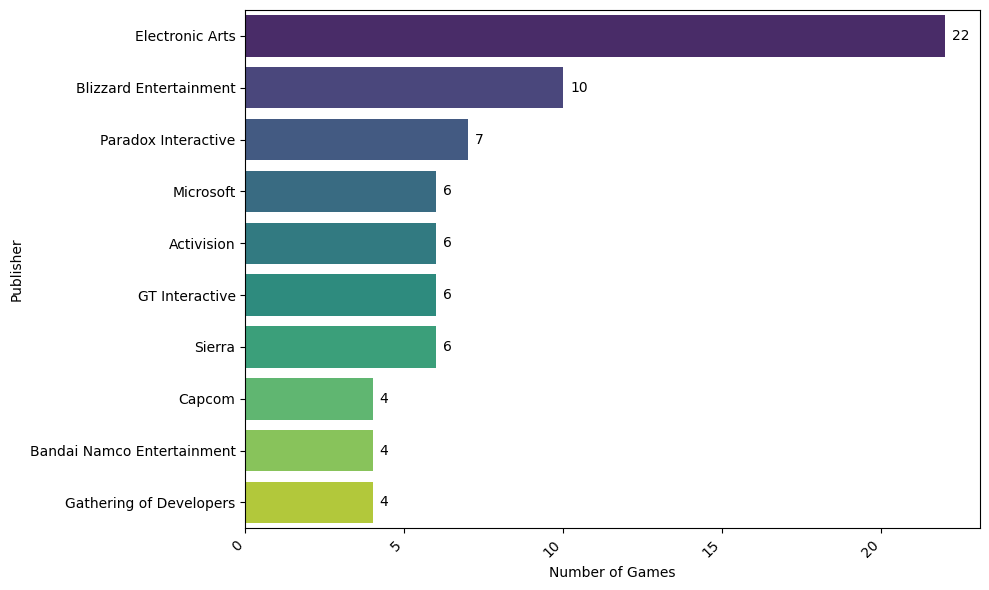

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=publisher_count.head(10).values, y=publisher_count.head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
# plt.title('Top 10 Publishers by games released')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

# display value on the bars
for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## 3. Which developer developed most of the games?

In [ ]:
developer_count = df_final['Developer'].value_counts()
print(developer_count.idxmax())

Blizzard Entertainment


In [ ]:
developer_count.head(10)

Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
id Software                   4
Westwood Studios              4
Capcom                        4
Ensemble Studios              4
CD Projekt Red                4
Valve                         4
Illusion Softworks            3
Name: Developer, dtype: int64

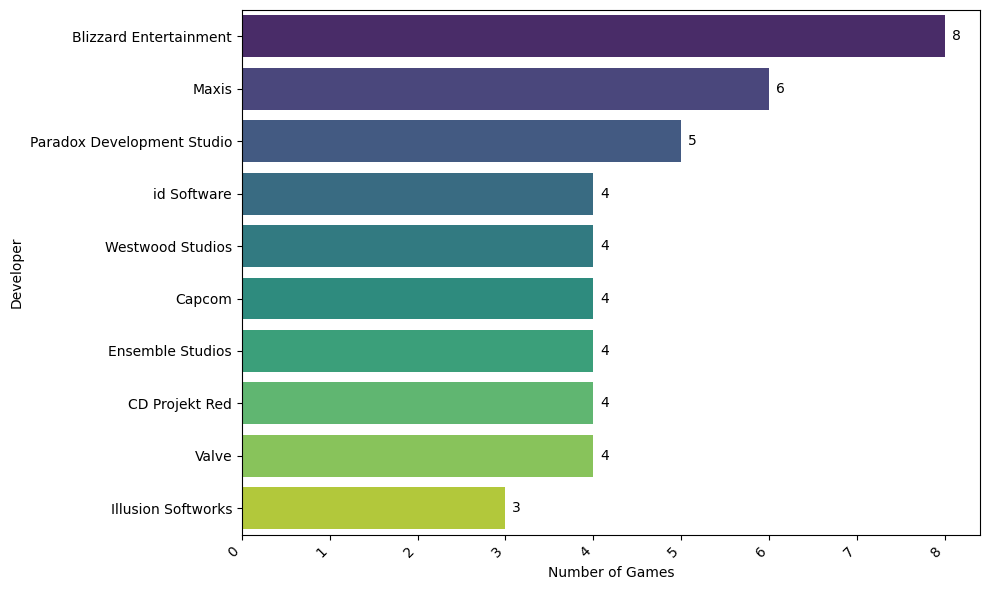

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=developer_count.head(10).values, y=developer_count.head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Games')
plt.ylabel('Developer')
# plt.title('Top 5 Developers by games released')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')
# Show the plot
plt.tight_layout()
plt.show()

## 4. Which series has the most sales? (revised after clean missing values)



In [ ]:
agg_series_by_sales = df_final.groupby('Series')['Sales'].sum()
print(agg_series_by_sales.idxmax())

PlayerUnknown's Battlegrounds


In [ ]:
agg_series_by_sales.sort_values(ascending=False).head()

Series
PlayerUnknown's Battlegrounds    42.0
Minecraft                        33.0
Diablo                           26.0
The Sims                         24.0
Half-Life                        21.0
Name: Sales, dtype: float64

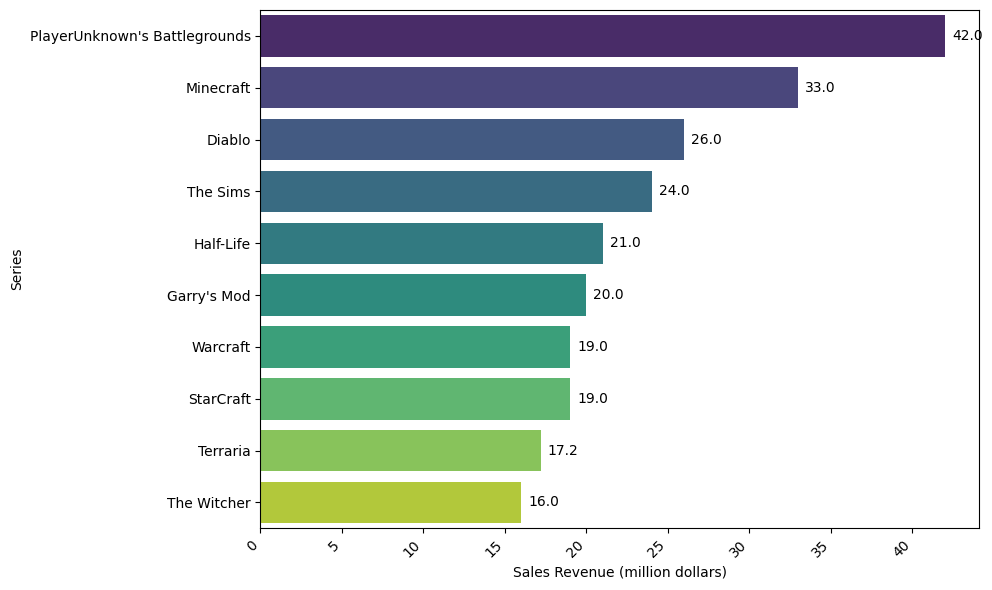

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=agg_series_by_sales.sort_values(ascending=False).head(10).values, y=agg_series_by_sales.sort_values(ascending=False).head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Sales Revenue (million dollars)')
plt.ylabel('Series')
#plt.title('Top 10 games series by sales revenue')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

for p in plot.patches:
    plot.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## 5. Which series has the most games?

In [ ]:
series_counts = df_final['Series'].value_counts()
print(series_counts.idxmax())

Command & Conquer


In [ ]:
series_counts.sort_values(ascending=False).head()

Command & Conquer    5
StarCraft            4
Civilization         4
Age of Empires       4
Warcraft             3
Name: Series, dtype: int64

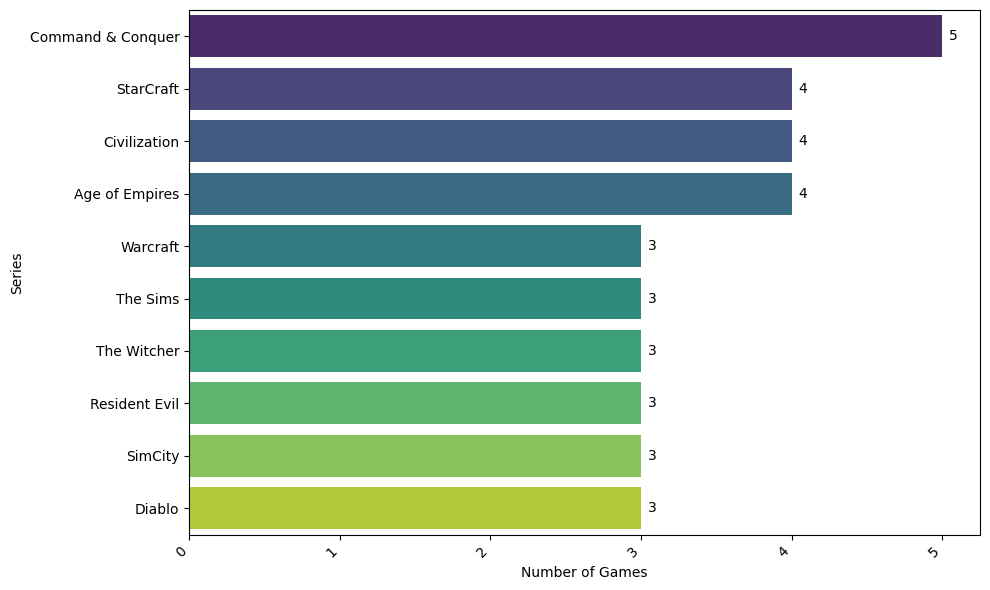

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=series_counts.sort_values(ascending=False).head(10).values, y=series_counts.sort_values(ascending=False).head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Games')
plt.ylabel('Series')
# plt.title('Top 10 games series by number of games')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## 6. Which game's genre is the most published?

In [ ]:
genre_counts = df_final['Genre'].value_counts()
print(genre_counts.idxmax())

Real-time strategy


In [ ]:
genre_counts.sort_values(ascending=False).head()

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
Name: Genre, dtype: int64

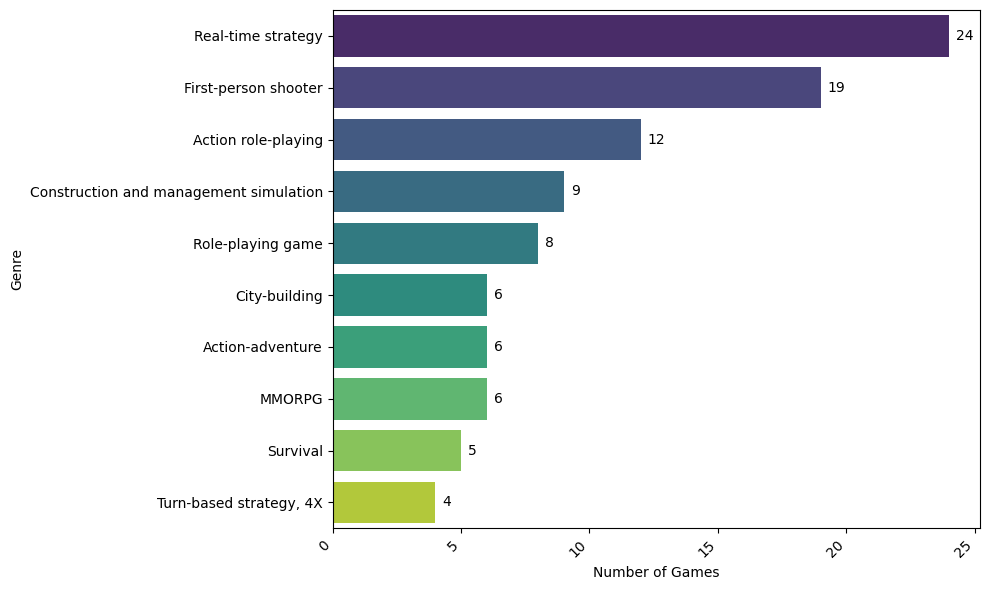

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=genre_counts.sort_values(ascending=False).head(10).values, y=genre_counts.sort_values(ascending=False).head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Games')
plt.ylabel('Genre')
# plt.title('Top 10 games genre by number of games')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## 7. Which genre has the most sales?

In [ ]:
agg_genre_by_sales = df_final.groupby('Genre')['Sales'].sum()
print(agg_genre_by_sales.idxmax())

Action role-playing


In [ ]:
agg_genre_by_sales.sort_values(ascending=False)

Genre
Action role-playing                           58.1
Real-time strategy                            55.0
Battle royale                                 52.0
First-person shooter                          46.0
Sandbox, survival                             33.0
                                              ... 
Real-time strategy, grand strategy wargame     1.0
Platform                                       1.0
Rail shooter                                   1.0
Point-and-click                                1.0
Real-time tactics                              1.0
Name: Sales, Length: 61, dtype: float64

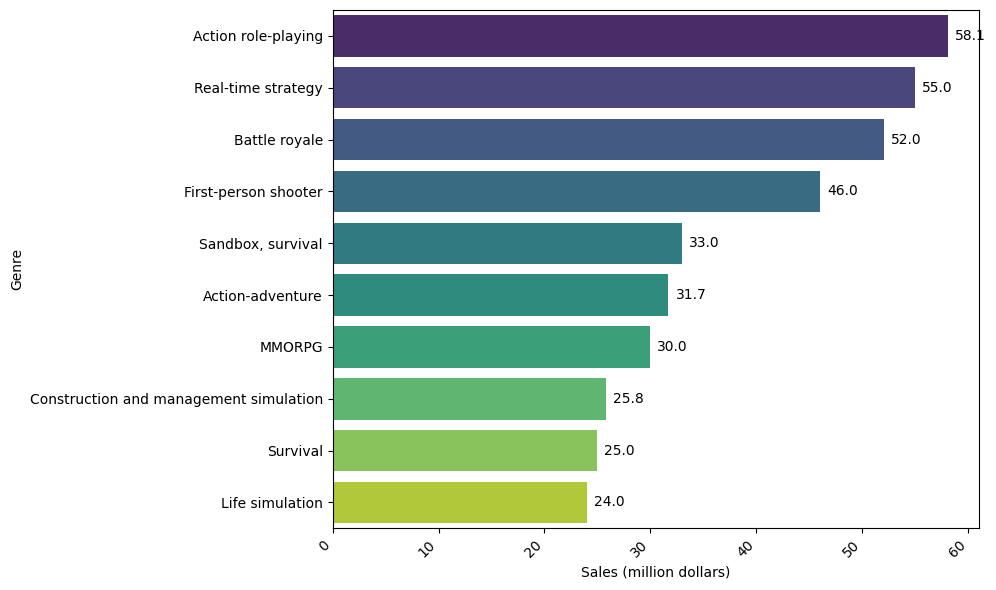

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=agg_genre_by_sales.sort_values(ascending=False).head(10).values, y=agg_genre_by_sales.sort_values(ascending=False).head(10).index, palette='viridis')

# Add labels and title
plt.xlabel('Sales (million dollars)')
plt.ylabel('Genre')
#plt.title('Top 10 games series by sales revenue')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=45, ha='right')

for p in plot.patches:
    plot.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## 8. Which genre that the top 5 publisher mostly released? (revised)

In [ ]:
top_publishers = df_final['Publisher'].value_counts().head(3).index
df_filtered = df_final[df_final['Publisher'].isin(top_publishers)]

In [ ]:
publisher_genre_counts = df_filtered.groupby(['Publisher', 'Genre']).size().reset_index(name='Count').sort_values(ascending=False, by=['Publisher','Count'])
print(publisher_genre_counts)

                 Publisher                                       Genre  Count
22     Paradox Interactive                              Grand strategy      3
20     Paradox Interactive                            Action-adventure      1
21     Paradox Interactive                               City-building      1
23     Paradox Interactive                     RTS, 4X, Grand Strategy      1
24     Paradox Interactive  Real-time strategy, grand strategy wargame      1
18               Microsoft                          Real-time strategy      4
17               Microsoft                   Amateur flight simulation      1
19               Microsoft                           Role-playing game      1
11         Electronic Arts                        First-person shooter      5
9          Electronic Arts                               City-building      3
12         Electronic Arts                                    God game      3
13         Electronic Arts                             Life simu

<ipython-input-46-22802a145dd3>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = plt.cm.get_cmap('tab20', len(publisher_genre_counts.columns))


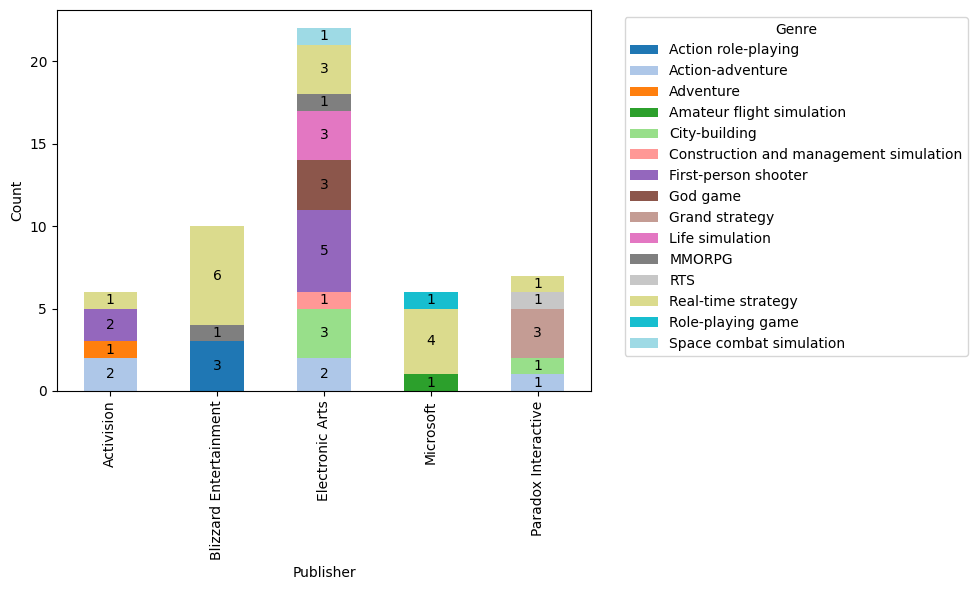

In [ ]:
# Group by 'Publisher' and 'Genre', and count occurrences
publisher_genre_counts = df_filtered.groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

# Define a custom color palette with more distinct colors
custom_cmap = plt.cm.get_cmap('tab20', len(publisher_genre_counts.columns))
custom_colors = custom_cmap.colors

# Create a stacked bar chart
ax = publisher_genre_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)
plt.xlabel('Publisher')
plt.ylabel('Count')
#plt.title('Distribution of Genres Within Top Publishers')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

for idx, publisher in enumerate(publisher_genre_counts.index):
    sum = 0
    for genre in publisher_genre_counts.columns:
        count = publisher_genre_counts.loc[publisher, genre]
        if count > 0:
          ax.text(idx, sum + count / 2, str(count), ha='center', va='center')
        sum += count

plt.tight_layout()
plt.show()

<ipython-input-41-5504f8cb19b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Genre'] = df_filtered['Genre'].str.extract(r'([^,]+)')
<ipython-input-41-5504f8cb19b8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = plt.cm.get_cmap('tab20', len(publisher_genre_counts.columns))


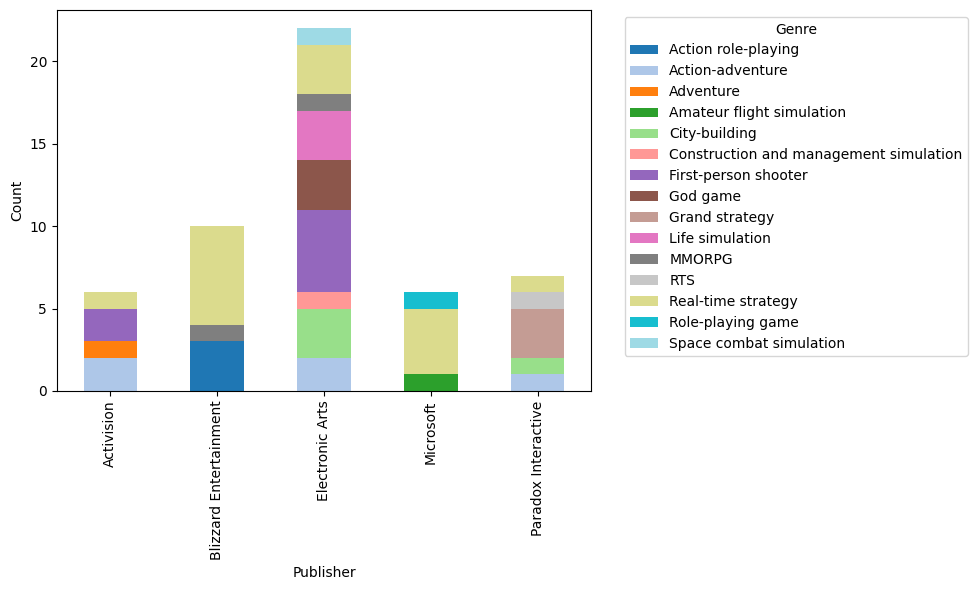

In [ ]:
# Extract individual genres
df_filtered['Genre'] = df_filtered['Genre'].str.extract(r'([^,]+)')

# Group by 'Publisher' and 'Genre', and count occurrences
publisher_genre_counts = df_filtered.groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

# Define a custom color palette with more distinct colors
custom_cmap = plt.cm.get_cmap('tab20', len(publisher_genre_counts.columns))
custom_colors = custom_cmap.colors

# Create a stacked bar chart with custom colors
ax = publisher_genre_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()